<a href="https://colab.research.google.com/github/rabinderthakur9/The-Spark-Foundation-/blob/main/Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

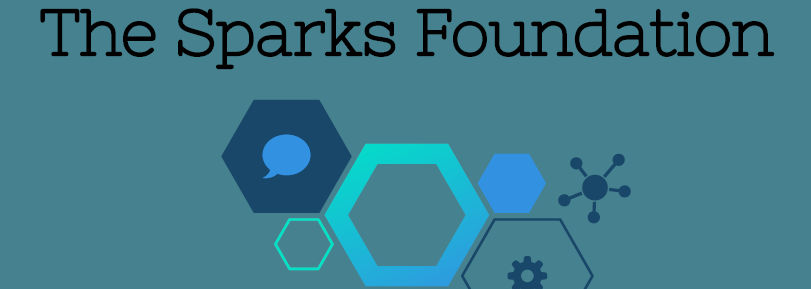

# The Spark Foundation Task 3
## Authour : Rabindar thakur

Problem Defination : Exploratory Data Analysis Using the Superstore Dataset. EDA on data to find the ways to improve the profit in different region.

## Importing The Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

In [31]:
data =pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Exploration

In [32]:
data.shape

(9994, 13)

In [33]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [58]:
#Sum of null Values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [59]:
#Description of the data with the numerical value
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [60]:
#Sum of duplicate values
data.duplicated().sum()

17

## Data Cleaning

In [61]:
#Dropping the duplicate values
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [62]:
#Postel Code is of No use in this Analysis so we are just Dropping the colum
dataset = data.drop(['Postal Code'],axis=1)
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Analysis

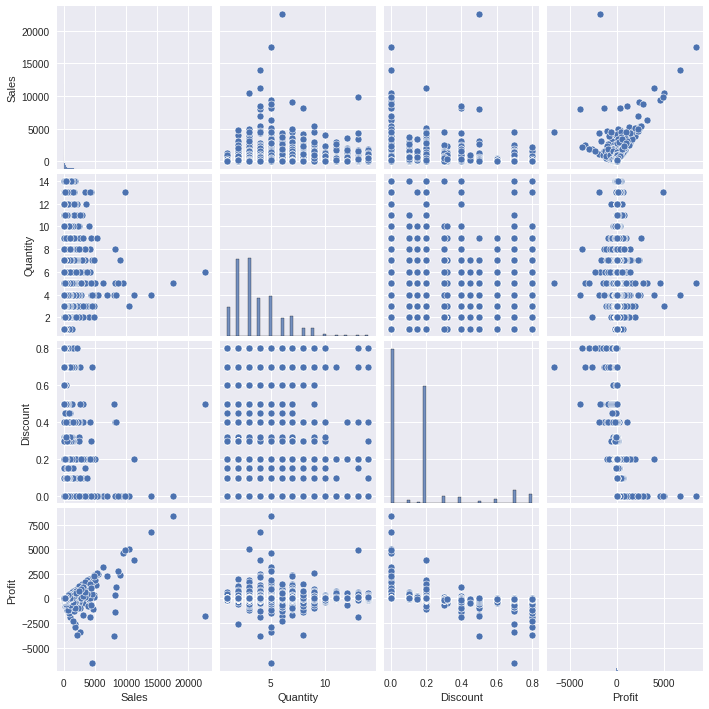

In [57]:
#A pairplot plot a pairwise relationships in a dataset. 
#The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.


sns.pairplot(dataset)

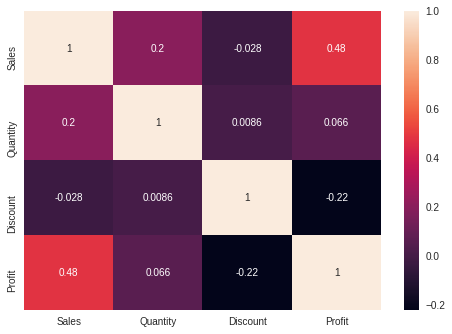

In [63]:
#using the Corelation the Data we are visualizing it
dataset.corr()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

## Data Visualization

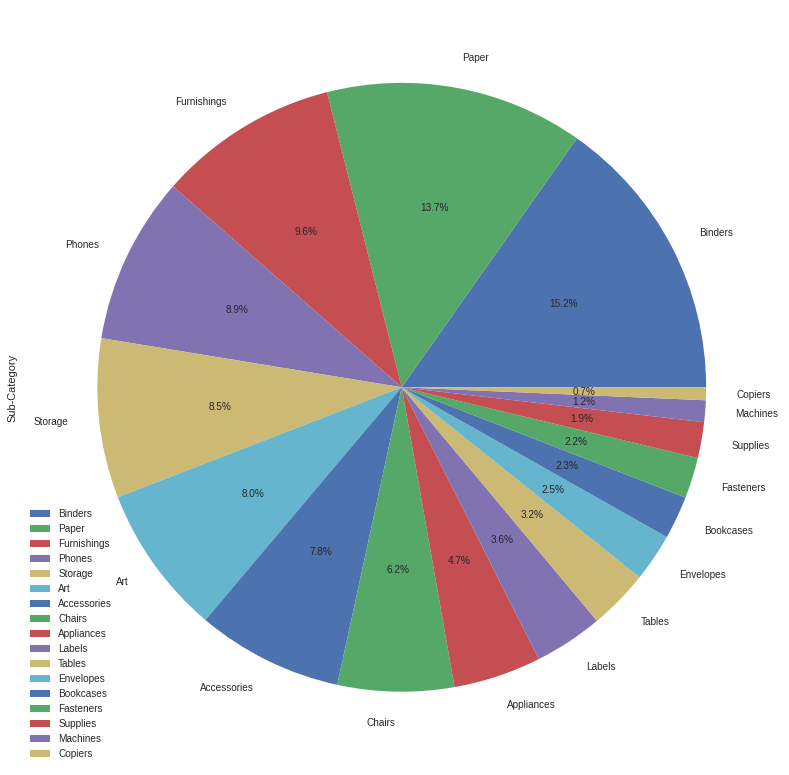

In [64]:
#Using the Pie chart we are visualizing the different percentage of subcatagory in the data
plt.figure(figsize=(20,14))
dataset['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend()

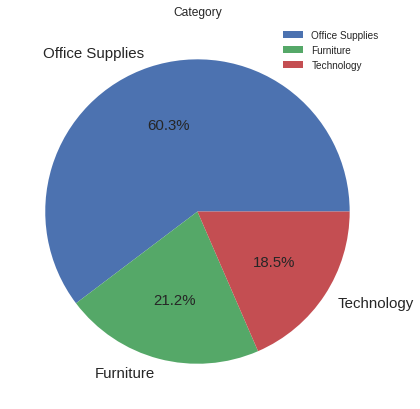

In [65]:
#overall percentage of catagory in the data and their sales percentage.
plt.figure(figsize = (8,7))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(dataset['Category'].value_counts(), labels=dataset['Category'].value_counts().index,autopct='%1.1f%%',textprops = textprops)
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x1152 with 0 Axes>

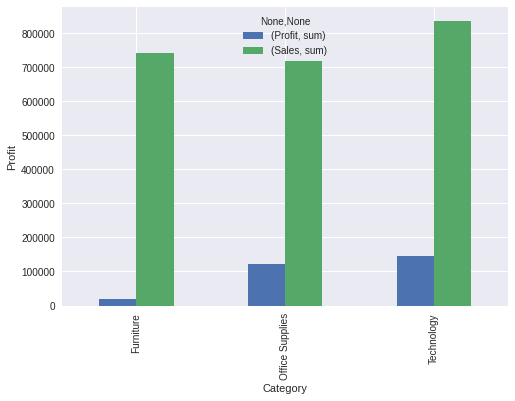

In [66]:
#Profit Vs Sales of the three different catagory.
plt.figure(figsize= (10,16))
dataset.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

In [45]:
# computing top categories in terms of sales from first 100 observations
top_subcategory_sales = dataset.groupby("Category").Sales.sum().nlargest(n=100)
top_subcategory_sales

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

In [46]:
# computing top categories in terms of profit from first 100 observations
top_subcategory_profit = dataset.groupby("Category").Profit.sum().nlargest(n=100)
top_subcategory_profit

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

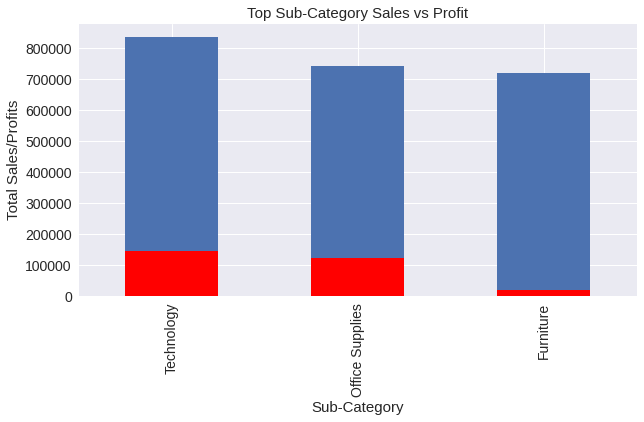

In [67]:
# Visualizing the top 100 subcatagory with the profit vs sales
plt.style.use('seaborn')
top_subcategory_sales.plot(kind = 'bar',figsize = (10,5),fontsize = 14)
top_subcategory_profit.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = 'red')
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Total Sales/Profits',fontsize = 15)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 15)
plt.show()

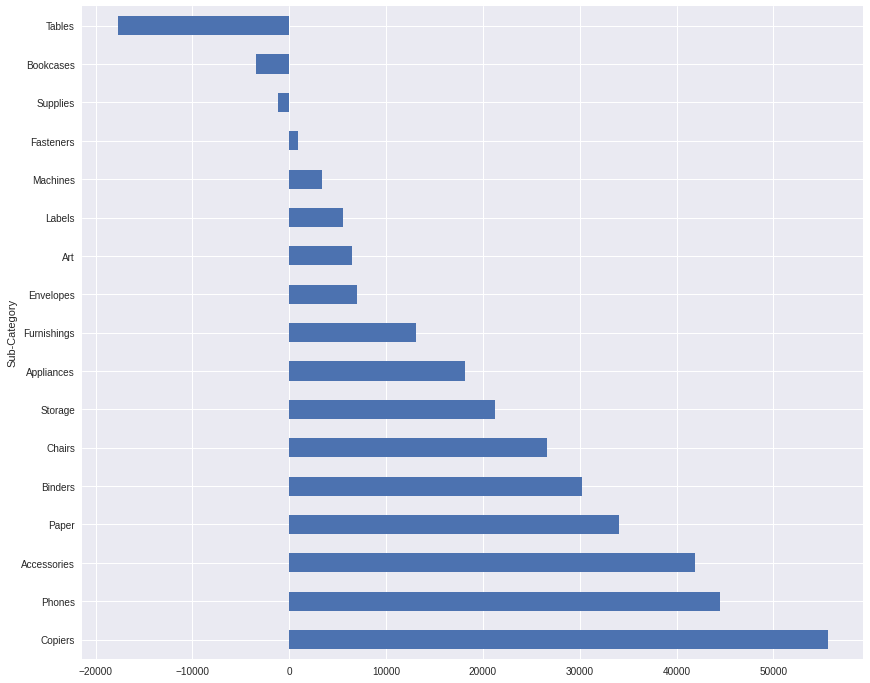

In [68]:
# A more detailed view of profit and the subcatagory
plt.figure(figsize=(14,12))
statewise = dataset.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


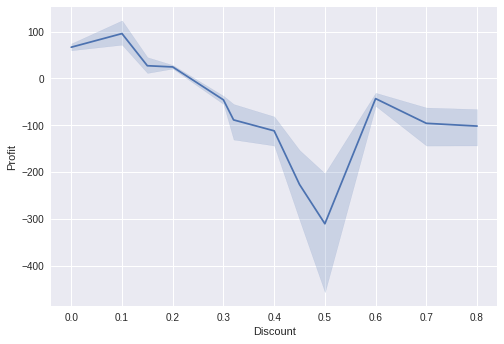

In [69]:
#plotting the line graph to see the relationship between profit vs discount

sns.lineplot(dataset['Discount'], dataset['Profit'], data=dataset)

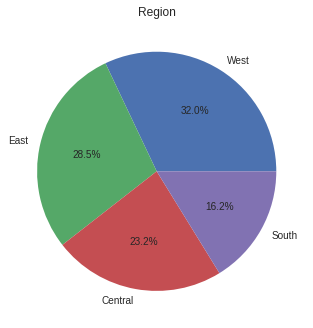

In [70]:
#plotting the Different region to see where the most of the sales are done.

plt.title('Region')
plt.pie(dataset['Region'].value_counts(), labels=dataset['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [51]:
# computing top states in terms of sales from first 10 observations
top_states_sales = dataset.groupby("State").Sales.sum().nlargest(n=10)
top_states_sales

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

In [52]:
# computing top states in terms of profit from first 10 observations
top_states_profit = dataset.groupby("State").Profit.sum().nlargest(n = 10)
top_states_profit

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

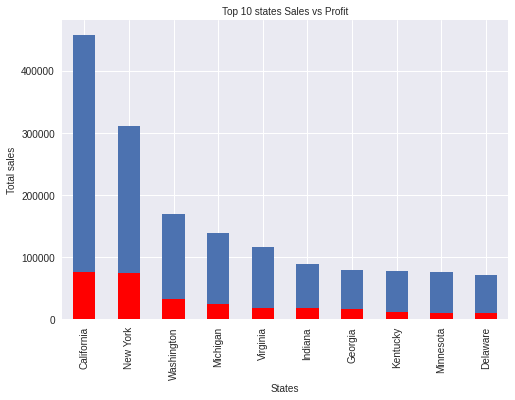

In [71]:
#plotting the top 10 states and profit to get the insights.

plt.style.use('seaborn')
top_states_sales.plot(kind = 'bar',fontsize = 10)
top_states_profit.plot(kind = 'bar',fontsize = 10, color = 'red')
plt.xlabel('States',fontsize = 10)
plt.ylabel('Total sales',fontsize = 10)
plt.title("Top 10 states Sales vs Profit",fontsize = 10)
plt.show()

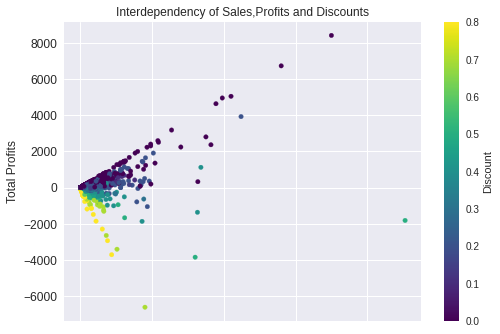

In [76]:
#visualizingthe profit and sales with the discount


plt.style.use('seaborn')
dataset.plot(kind = "scatter", x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 12, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 12)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 12)
plt.show()

# Conclusion

As the Manager of the Superstore I would like to conclude through this analysis that:

*   We should increase the sales in the office Supplies and Technology as profit is more in that catagory.




*   We should increase the sales in the states like New York and Calafornia as the sales and the profits are more there.

